In [308]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [4]:
assam_receipts = pd.read_csv(r'/home/ubuntu/civicdatalab/Assam budgetboard/dataset/receipts data/assamprocessedreceipts.csv')

In [276]:
groupby_Major = pd.read_csv('/home/ubuntu/civicdatalab/Assam budgetboard/dataset/receipts data/groupby data/groupby_Major.csv')

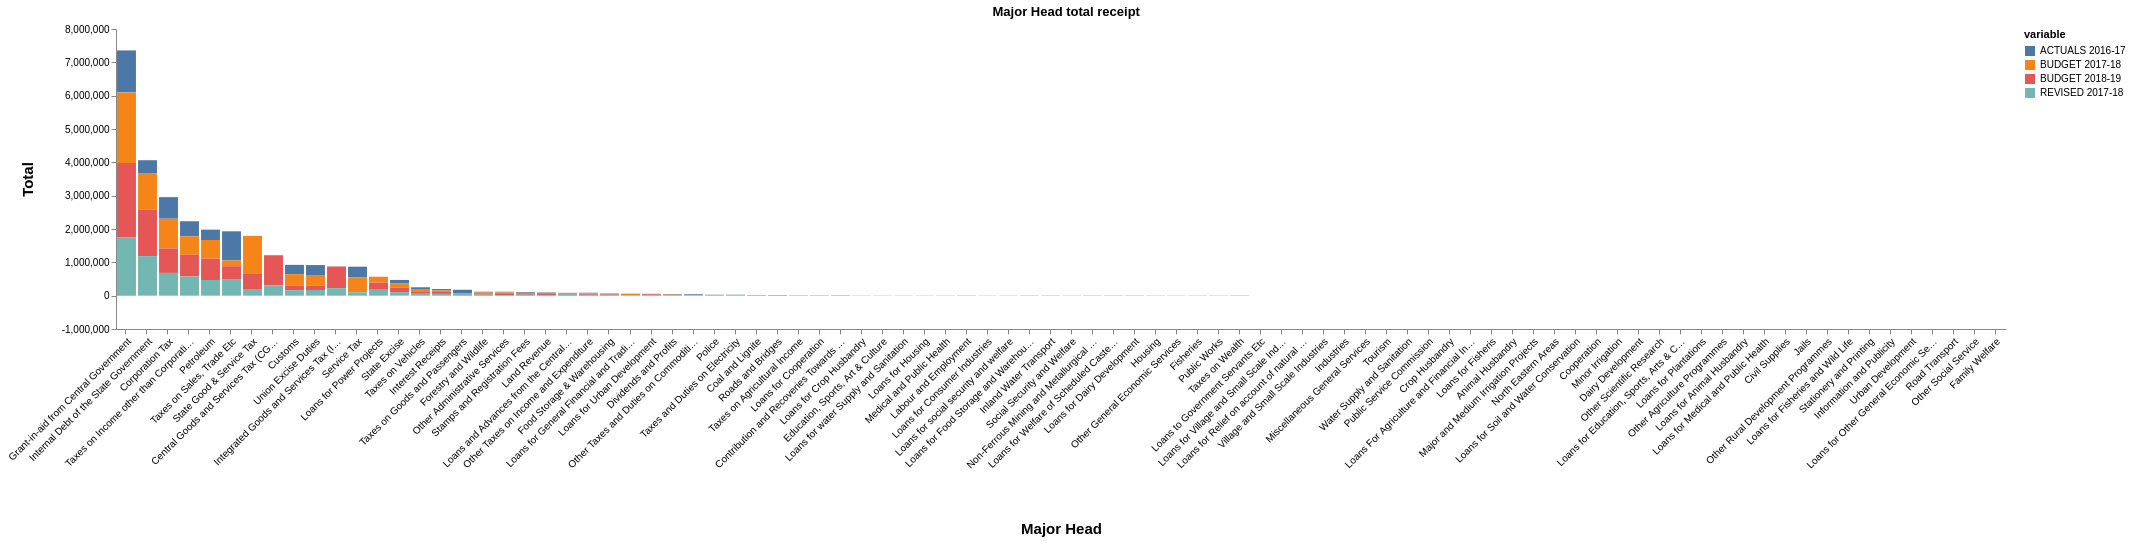

In [277]:
df = pd.DataFrame({
    'index': groupby_Major['Major Head'],
    'BUDGET 2018-19': groupby_Major['BUDGET 2018-19'],
    'REVISED 2017-18' : groupby_Major['REVISED 2017-18'],
    'BUDGET 2017-18': groupby_Major['BUDGET 2017-18'],
    'ACTUALS 2016-17': groupby_Major['ACTUALS 2016-17']
})
alt.Chart(df.melt('index')).mark_bar().encode(
    alt.X('index:N', axis=alt.Axis(title='Major Head'), sort = alt.EncodingSortField(field = 'value',op = 'sum', order = 'descending')),
    alt.Y('value:Q', axis=alt.Axis(title='Total', grid=False)),
    color=alt.Color('variable:N'),
    tooltip=['value:Q', 'index:N', 'variable:N']
   
).configure_view(
    stroke='transparent'
    
).configure_axisX(
     labelAngle = 315,
    titlePadding = 50,
    titleFontSize = 15
    
).configure_axisY(
    titlePadding = 25,
    titleFontSize = 15
).properties(
    title='Major Head total receipt').interactive()

In [281]:
groupby_Minor = pd.read_csv('/home/ubuntu/civicdatalab/Assam budgetboard/dataset/receipts data/groupby data/groupby_Minor.csv')

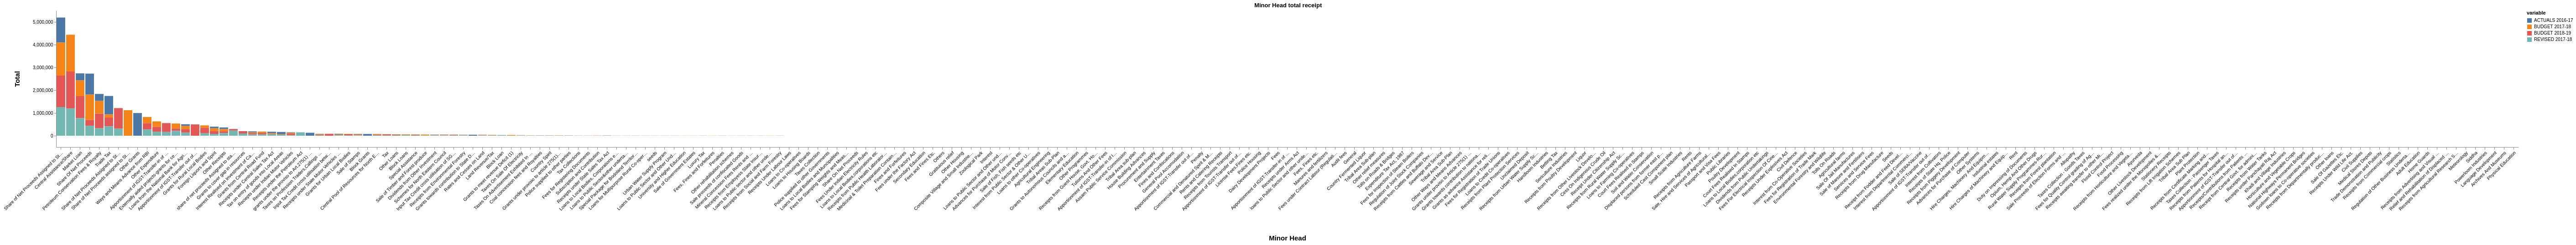

In [282]:
df = pd.DataFrame({
    'index': groupby_Minor['Minor Head'],
    'BUDGET 2018-19': groupby_Minor['BUDGET 2018-19'],
    'REVISED 2017-18' : groupby_Minor['REVISED 2017-18'],
    'BUDGET 2017-18': groupby_Minor['BUDGET 2017-18'],
    'ACTUALS 2016-17': groupby_Minor['ACTUALS 2016-17']
})

alt.Chart(df.melt('index')).mark_bar().encode(
    alt.X('index:N', axis=alt.Axis(title='Minor Head'), sort = alt.EncodingSortField(field = 'value',op = 'sum', order = 'descending')),
    alt.Y('value:Q', axis=alt.Axis(title='Total', grid=False)),
    color=alt.Color('variable:N'),
    tooltip=['value:Q', 'index:N', 'variable:N']
   
).configure_view(
    stroke='transparent'
    
).configure_axisX(
     labelAngle = 315,
    titlePadding = 50,
    titleFontSize = 15
    
).configure_axisY(
    titlePadding = 25,
    titleFontSize = 15
).properties(
    title='Minor Head total receipt').interactive()


In [296]:
groupby_Area = pd.read_csv('/home/ubuntu/civicdatalab/Assam budgetboard/dataset/receipts data/groupby data/groupby_Area.csv' )

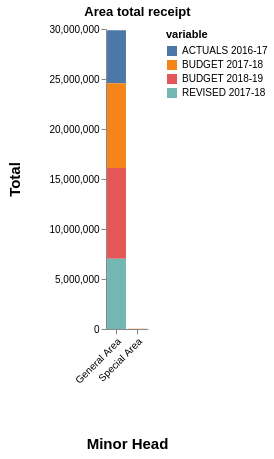

In [297]:
df = pd.DataFrame({
    'index': groupby_Area['Area'],
    'BUDGET 2018-19': groupby_Area['BUDGET_2018_19'],
    'REVISED 2017-18' : groupby_Area['REVISED_2017_18'],
    'BUDGET 2017-18': groupby_Area['BUDGET_2017_18'],
    'ACTUALS 2016-17': groupby_Area['ACTUALS_2016_17']
})

alt.Chart(df.melt('index')).mark_bar().encode(
    alt.X('index:N', axis=alt.Axis(title='Area'), sort = alt.EncodingSortField(field = 'value',op = 'sum', order = 'descending')),
    alt.Y('value:Q', axis=alt.Axis(title='Total', grid=False)),
    color=alt.Color('variable:N'),
    tooltip=['value:Q', 'index:N', 'variable:N']
).configure_view(
    stroke='transparent'
    
).configure_axisX(
     labelAngle = 315,
    titlePadding = 50,
    titleFontSize = 15
    
).configure_axisY(
    titlePadding = 25,
    titleFontSize = 15
).properties(
    title='Area total receipt'
).interactive()


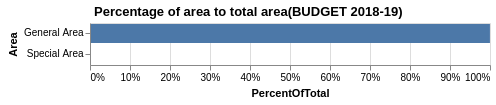

In [26]:
alt.Chart(groupby_Area).mark_bar().encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='Area:N'
).transform_window(
    TotalArea='sum(BUDGET_2018_19)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.BUDGET_2018_19/datum.TotalArea"
).properties(
    title='Percentage of area to total area(BUDGET 2018-19)'
).interactive()

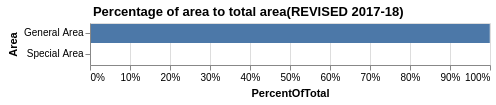

In [27]:
alt.Chart(groupby_Area).mark_bar().encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='Area:N'
).transform_window(
    TotalArea='sum(REVISED_2017_18)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.REVISED_2017_18/datum.TotalArea"
).properties(
    title='Percentage of area to total area(REVISED 2017-18)'
).interactive()


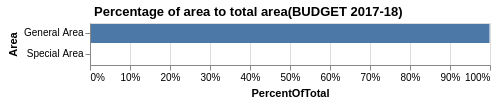

In [28]:
alt.Chart(groupby_Area).mark_bar().encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='Area:N'
).transform_window(
    TotalArea='sum(BUDGET_2017_18)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.BUDGET_2017_18/datum.TotalArea"
).properties(
    title='Percentage of area to total area(BUDGET 2017-18)'
).interactive()


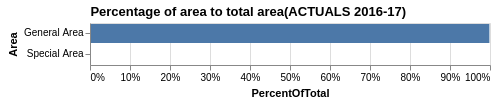

In [29]:
alt.Chart(groupby_Area).mark_bar().encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='Area:N'
).transform_window(
    TotalArea='sum(ACTUALS_2016_17)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.ACTUALS_2016_17/datum.TotalArea"
).properties(
    title='Percentage of area to total area(ACTUALS 2016-17)'
).interactive()


In [30]:
groupby_Area_count = assam_receipts.groupby('Area').count()

In [31]:
groupby_Area_count.reset_index(inplace = True)

In [33]:
groupby_Area_count.columns = ['Area', 'Total Count', 'HEAD OF ACCOUNT', 'HEAD DESCRIPTION', 'Major Head', 'Sub-Major Head', 'Minor Head', 'Sub-Minor Head', 'Detailed Head', 'Object Head','Voucher Head','ACTUALS 2016-17', 'BUDGET 2017-18','REVISED 2017-18','BUDGET 2018-19']

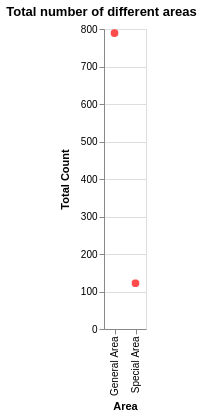

In [166]:
alt.Chart(groupby_Area_count).mark_circle(size=60, color = 'red').encode(
    x='Area',
    y='Total Count',
    tooltip = ['Area', 'Total Count']
).interactive().properties(
title = 'Total number of different areas')

In [300]:
total_BE_RE = pd.read_csv('/home/ubuntu/civicdatalab/Assam budgetboard/dataset/receipts data/groupby data/total_BE_RE.csv')

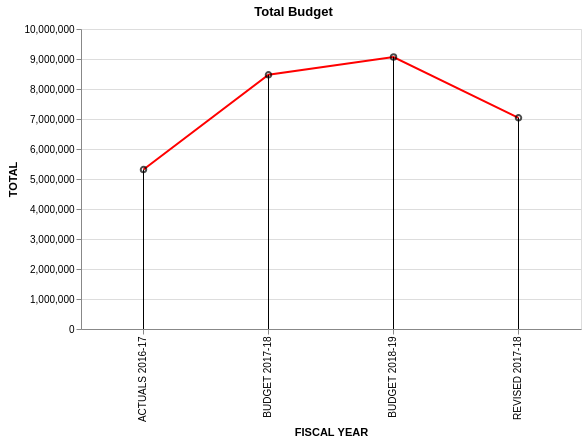

In [301]:
base = alt.Chart(total_BE_RE).encode(
    x='FISCAL YEAR:N',
    y='TOTAL:Q',
).properties(
width = 500)
alt.layer(
  base.mark_line(color = 'red'),
  base.mark_point(color = 'black'),
  base.mark_rule(),

).interactive().properties(
title = 'Total Budget')

In [39]:
tax = pd.read_csv('/home/ubuntu/civicdatalab/Assam budgetboard/dataset/receipts data/tax.csv' )

In [303]:
groupby_Tax = pd.read_csv('/home/ubuntu/civicdatalab/Assam budgetboard/dataset/receipts data/groupby data/groupby_Tax.csv' )

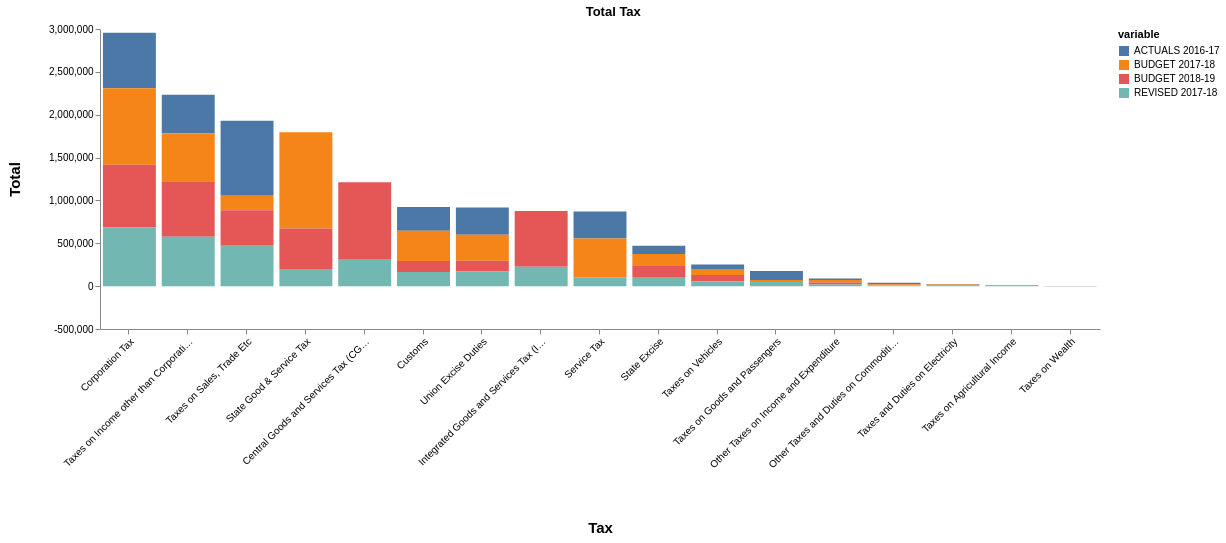

In [304]:
df = pd.DataFrame({
    'index': groupby_Tax['Major Head'],
    'BUDGET 2018-19': groupby_Tax['BUDGET 2018-19'],
    'REVISED 2017-18' : groupby_Tax['REVISED 2017-18'],
    'BUDGET 2017-18': groupby_Tax['BUDGET 2017-18'],
    'ACTUALS 2016-17': groupby_Tax['ACTUALS 2016-17']
})

alt.Chart(df.melt('index')).mark_bar().encode(
    alt.X('index:N', axis=alt.Axis(title='Tax'), sort = alt.EncodingSortField(field = 'value',op = 'sum', order = 'descending')),
    alt.Y('value:Q', axis=alt.Axis(title='Total', grid=False)),
    
    color=alt.Color('variable:N'),
    tooltip=['value:Q', 'index:N', 'variable:N']
).configure_view(
    stroke='transparent'
    
).configure_axisX(
     labelAngle = 315,
    titlePadding = 50,
    titleFontSize = 15
    
).configure_axisY(
    titlePadding = 25,
    titleFontSize = 15
).properties(
    width = 1000
).interactive().properties(
title = 'Total Tax')


In [44]:
loans = pd.read_csv('/home/ubuntu/civicdatalab/Assam budgetboard/dataset/receipts data/loans.csv' )

In [306]:
groupby_Loans = pd.read_csv('/home/ubuntu/civicdatalab/Assam budgetboard/dataset/receipts data/groupby data/groupby_Loans.csv')

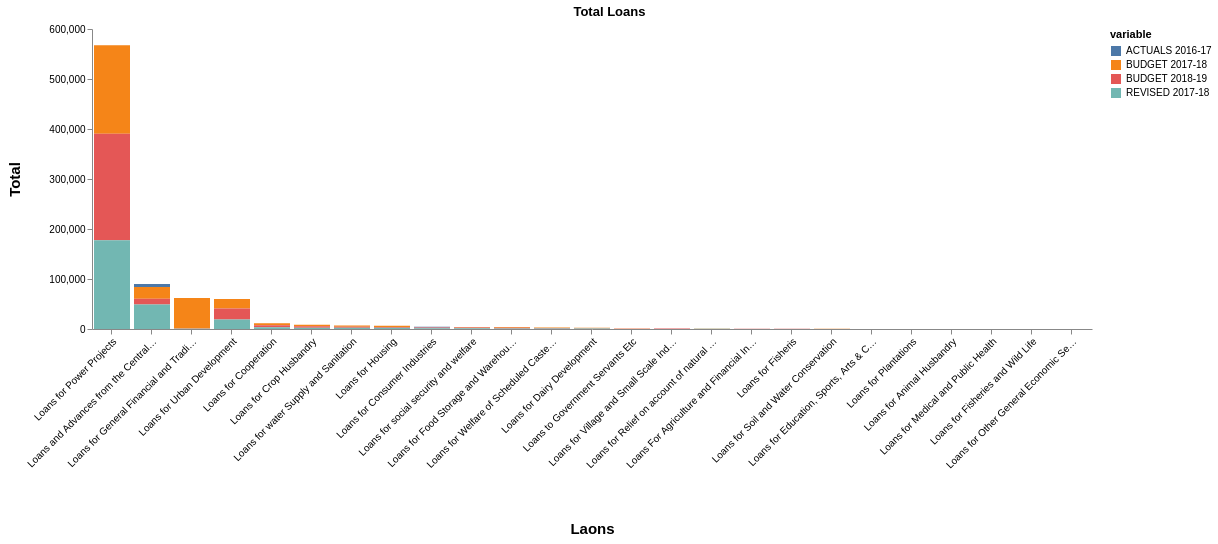

In [307]:
df1 = pd.DataFrame({
    'index': groupby_Loans['Major Head'],
    'BUDGET 2018-19': groupby_Loans['BUDGET 2018-19'],
    'REVISED 2017-18' : groupby_Loans['REVISED 2017-18'],
    'BUDGET 2017-18': groupby_Loans['BUDGET 2017-18'],
    'ACTUALS 2016-17': groupby_Loans['ACTUALS 2016-17']
})

alt.Chart(df1.melt('index')).mark_bar().encode(
    alt.X('index:N', axis=alt.Axis(title='Laons'), sort = alt.EncodingSortField(field = 'value',op = 'sum', order = 'descending')),
    alt.Y('value:Q', axis=alt.Axis(title='Total', grid=False)),
    
    color=alt.Color('variable:N'),
    tooltip=['value:Q', 'index:N', 'variable:N']
).configure_view(
    stroke='transparent'
    
).configure_axisX(
     labelAngle = 315,
    titlePadding = 50,
    titleFontSize = 15
    
).configure_axisY(
    titlePadding = 25,
    titleFontSize = 15
).properties(
    width = 1000
).interactive().properties(
title = 'Total Loans')

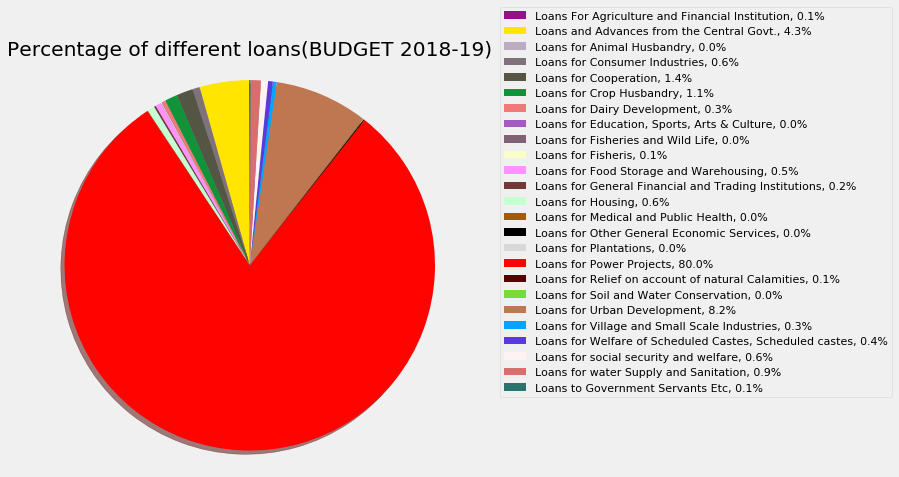

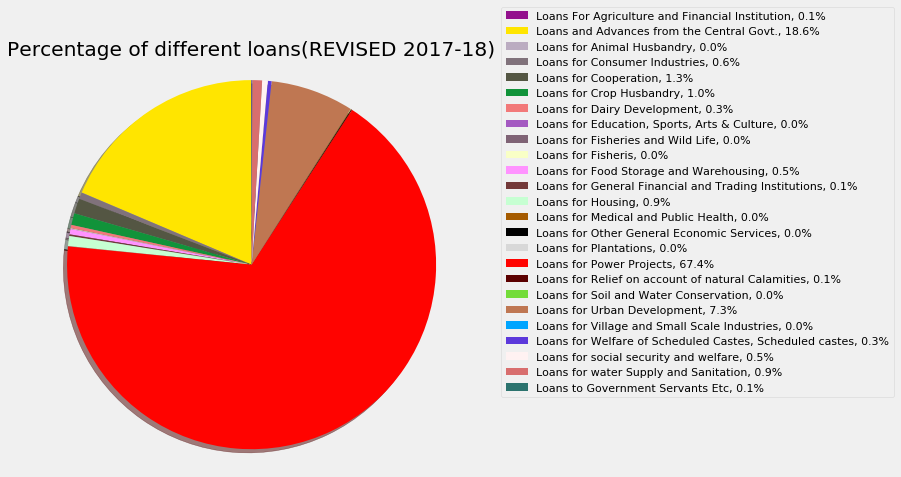

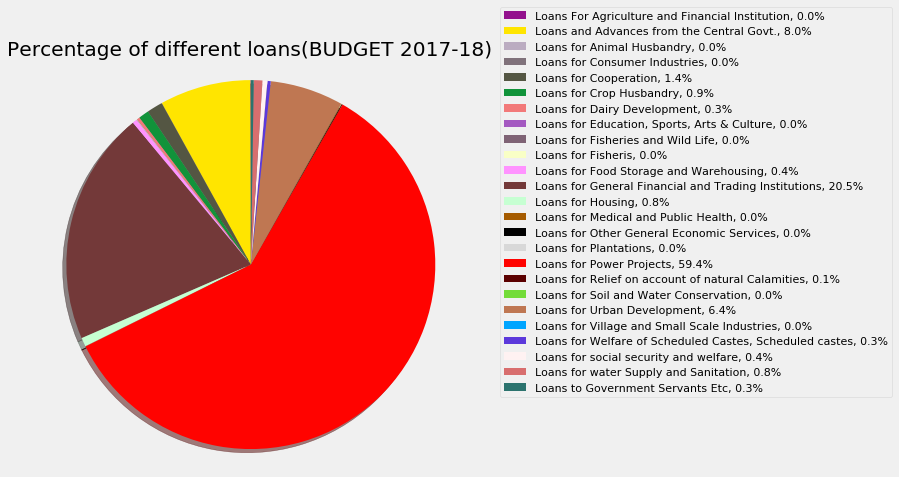

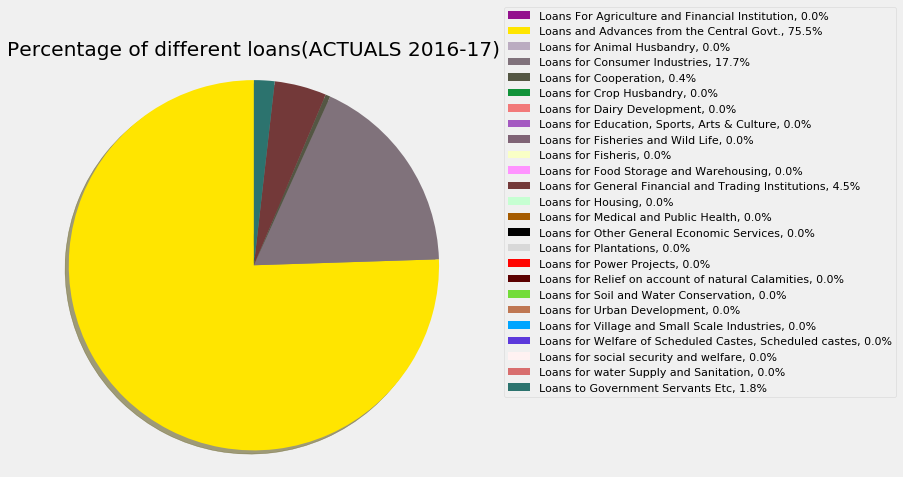

In [158]:
labels = groupby_Loans['Major Head']
sizes = groupby_Loans['BUDGET 2018-19']

color = ['#93118D', '#FFE500', '#BBACC1', '#80727B', '#545643', '#11933A','#F27979','#A459C1','#7F6375','#F9FFC6','#FF93FF','#733939','#C6FFD2','#A55B00','#000000', '#D8D8D8', '#FF0300','#5B0000','#73DC39','#BF7752','#00A5FF','#5C39DB','#FFF2F2','#D86E6E','#2C736E']  
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, shadow=True, startangle=90, colors = color)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
total = sum(sizes)
theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(1, 1),
    bbox_transform=fig1.transFigure
)
plt.title('Percentage of different loans(BUDGET 2018-19)')
plt.show()
labels = groupby_Loans['Major Head']
sizes = groupby_Loans['REVISED 2017-18']

color = ['#93118D', '#FFE500', '#BBACC1', '#80727B', '#545643', '#11933A','#F27979','#A459C1','#7F6375','#F9FFC6','#FF93FF','#733939','#C6FFD2','#A55B00','#000000', '#D8D8D8', '#FF0300','#5B0000','#73DC39','#BF7752','#00A5FF','#5C39DB','#FFF2F2','#D86E6E','#2C736E']   
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, shadow=True, startangle=90, colors = color)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
total = sum(sizes)
theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(1, 1),
    bbox_transform=fig1.transFigure
)
plt.title('Percentage of different loans(REVISED 2017-18)')
plt.show()
labels = groupby_Loans['Major Head']
sizes = groupby_Loans['BUDGET 2017-18']

color = ['#93118D', '#FFE500', '#BBACC1', '#80727B', '#545643', '#11933A','#F27979','#A459C1','#7F6375','#F9FFC6','#FF93FF','#733939','#C6FFD2','#A55B00','#000000', '#D8D8D8', '#FF0300','#5B0000','#73DC39','#BF7752','#00A5FF','#5C39DB','#FFF2F2','#D86E6E','#2C736E']   
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, shadow=True, startangle=90, colors = color)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
total = sum(sizes)
theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(1, 1),
    bbox_transform=fig1.transFigure
)
plt.title('Percentage of different loans(BUDGET 2017-18)')
plt.show()
labels = groupby_Loans['Major Head']
sizes = groupby_Loans['ACTUALS 2016-17']

color = ['#93118D', '#FFE500', '#BBACC1', '#80727B', '#545643', '#11933A','#F27979','#A459C1','#7F6375','#F9FFC6','#FF93FF','#733939','#C6FFD2','#A55B00','#000000', '#D8D8D8', '#FF0300','#5B0000','#73DC39','#BF7752','#00A5FF','#5C39DB','#FFF2F2','#D86E6E','#2C736E']   
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, shadow=True, startangle=90, colors = color)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
total = sum(sizes)
theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(1, 1),
    bbox_transform=fig1.transFigure
)
plt.title('Percentage of different loans(ACTUALS 2016-17)')
plt.show()

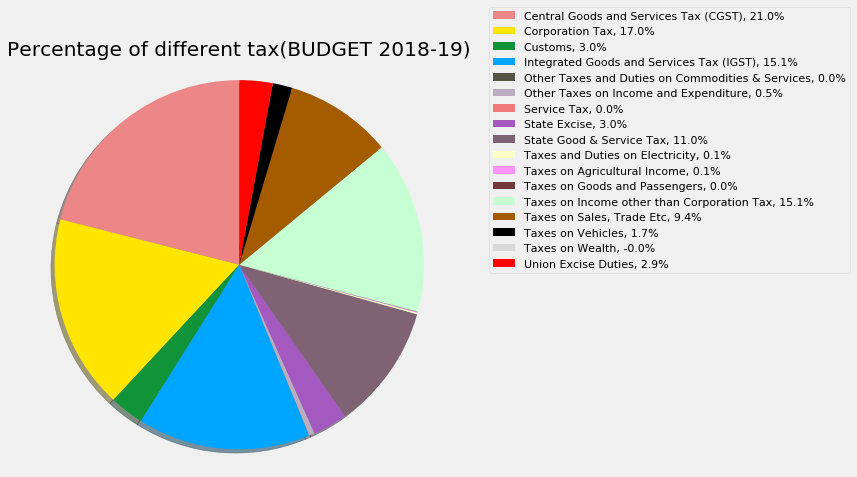

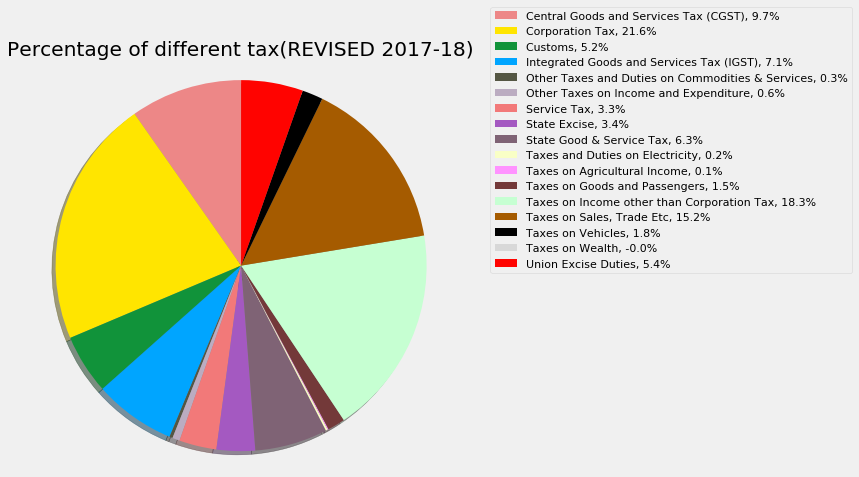

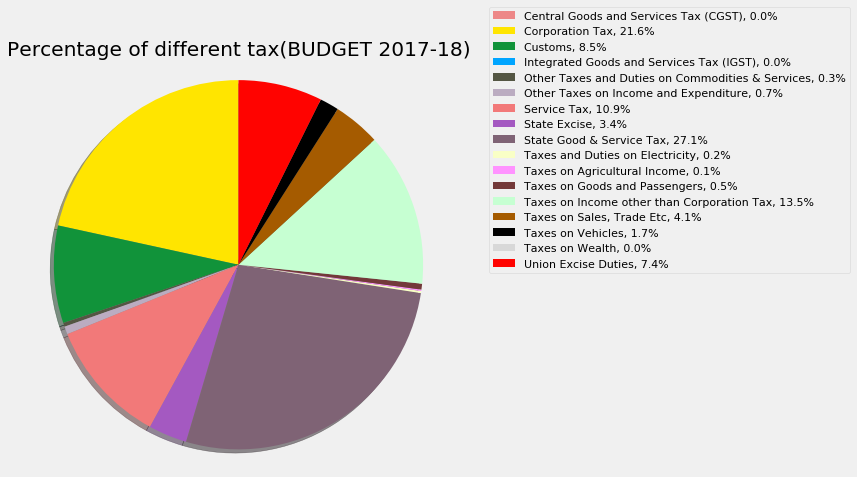

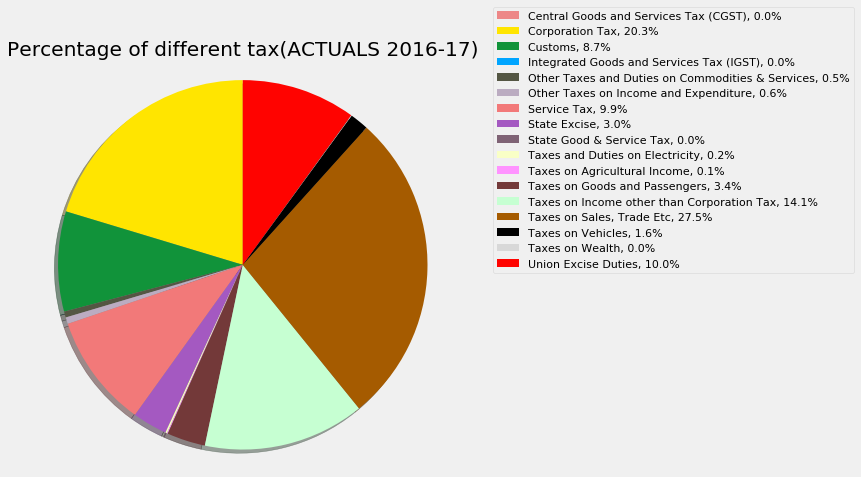

In [162]:
labels = groupby_Tax['Major Head']
sizes = groupby_Tax['BUDGET 2018-19']

color = ['#ED8787', '#FFE500', '#11933A', '#00A5FF', '#545643', '#BBACC1','#F27979','#A459C1','#7F6375','#F9FFC6','#FF93FF','#733939','#C6FFD2','#A55B00','#000000', '#D8D8D8', '#FF0300','#5B0000','#73DC39','#BF7752','#00A5FF','#5C39DB','#FFF2F2','#D86E6E','#2C736E']   
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, shadow=True, startangle=90, colors = color)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(1, 1),
    bbox_transform=fig1.transFigure
)
plt.title('Percentage of different tax(BUDGET 2018-19)')
plt.show()

          
labels = groupby_Tax['Major Head']
sizes = groupby_Tax['REVISED 2017-18']

color = ['#ED8787', '#FFE500', '#11933A', '#00A5FF', '#545643', '#BBACC1','#F27979','#A459C1','#7F6375','#F9FFC6','#FF93FF','#733939','#C6FFD2','#A55B00','#000000', '#D8D8D8', '#FF0300','#5B0000','#73DC39','#BF7752','#00A5FF','#5C39DB','#FFF2F2','#D86E6E','#2C736E']   
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, shadow=True, startangle=90, colors = color)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(1, 1),
    bbox_transform=fig1.transFigure
)
plt.title('Percentage of different tax(REVISED 2017-18)')
plt.show()
          
labels = groupby_Tax['Major Head']
sizes = groupby_Tax['BUDGET 2017-18']

color = ['#ED8787', '#FFE500', '#11933A', '#00A5FF', '#545643', '#BBACC1','#F27979','#A459C1','#7F6375','#F9FFC6','#FF93FF','#733939','#C6FFD2','#A55B00','#000000', '#D8D8D8', '#FF0300','#5B0000','#73DC39','#BF7752','#00A5FF','#5C39DB','#FFF2F2','#D86E6E','#2C736E']   
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, shadow=True, startangle=90, colors = color)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(1, 1),
    bbox_transform=fig1.transFigure
)
plt.title('Percentage of different tax(BUDGET 2017-18)')
plt.show()

labels = groupby_Tax['Major Head']
sizes = groupby_Tax['ACTUALS 2016-17']

color = ['#ED8787', '#FFE500', '#11933A', '#00A5FF', '#545643', '#BBACC1','#F27979','#A459C1','#7F6375','#F9FFC6','#FF93FF','#733939','#C6FFD2','#A55B00','#000000', '#D8D8D8', '#FF0300','#5B0000','#73DC39','#BF7752','#00A5FF','#5C39DB','#FFF2F2','#D86E6E','#2C736E']   
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, shadow=True, startangle=90, colors = color)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(1, 1),
    bbox_transform=fig1.transFigure
)
plt.title('Percentage of different tax(ACTUALS 2016-17)')
plt.show()

In [315]:
medical_group  = pd.read_csv('/home/ubuntu/civicdatalab/medical_group.csv')

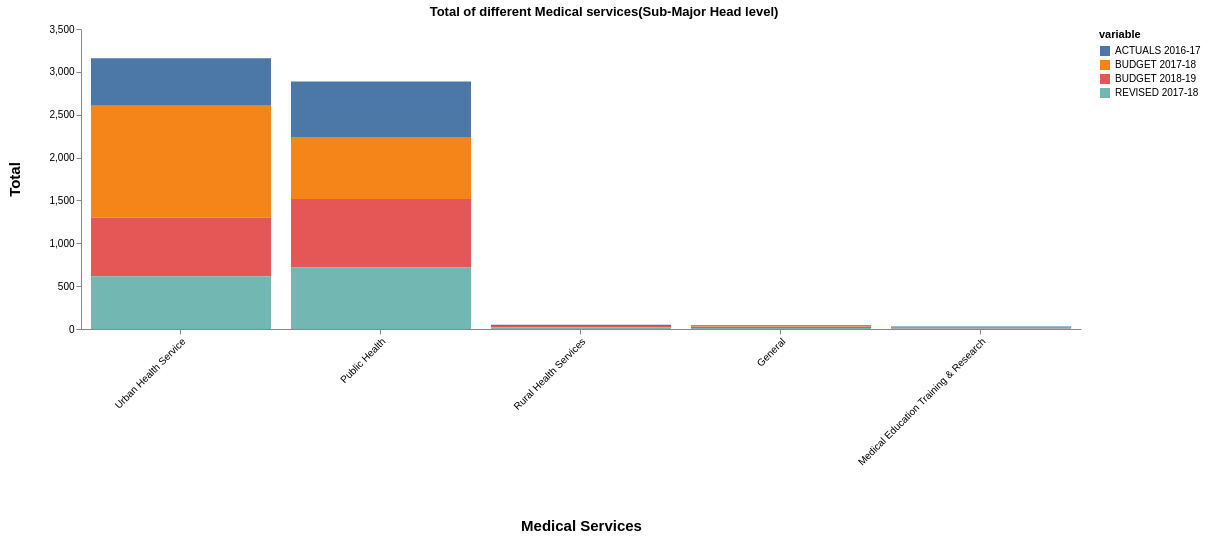

In [339]:
df2 = pd.DataFrame({
    'index': medical_group['Sub-Major Head'],
    'BUDGET 2018-19': medical_group['BUDGET_2018-19'],
    'REVISED 2017-18' : medical_group['REVISED_2017-18'],
    'BUDGET 2017-18': medical_group['BUDGET_2017-18'],
    'ACTUALS 2016-17': medical_group['ACTUALS_2016-17']
})

alt.Chart(df2.melt('index')).mark_bar().encode(
    alt.X('index:N', axis=alt.Axis(title='Medical Services',format='.0%'), sort = alt.EncodingSortField(field = 'value',op = 'sum', order = 'descending')),
    alt.Y('value:Q', axis=alt.Axis(title='Total', grid=False)),
    
    color=alt.Color('variable:N'),
    tooltip=['value:Q', 'index:N', 'variable:N']
).configure_view(
    stroke='transparent'
    
).configure_axisX(
     labelAngle = 315,
    titlePadding = 50,
    titleFontSize = 15
    
).configure_axisY(
    titlePadding = 25,
    titleFontSize = 15
).properties(
    width = 1000
).interactive().properties(
title = 'Total of different Medical services(Sub-Major Head level)')


In [318]:
groupby_Housing = pd.read_csv('/home/ubuntu/civicdatalab/Assam budgetboard/dataset/receipts data/groupby data/groupby_Housing.csv' )

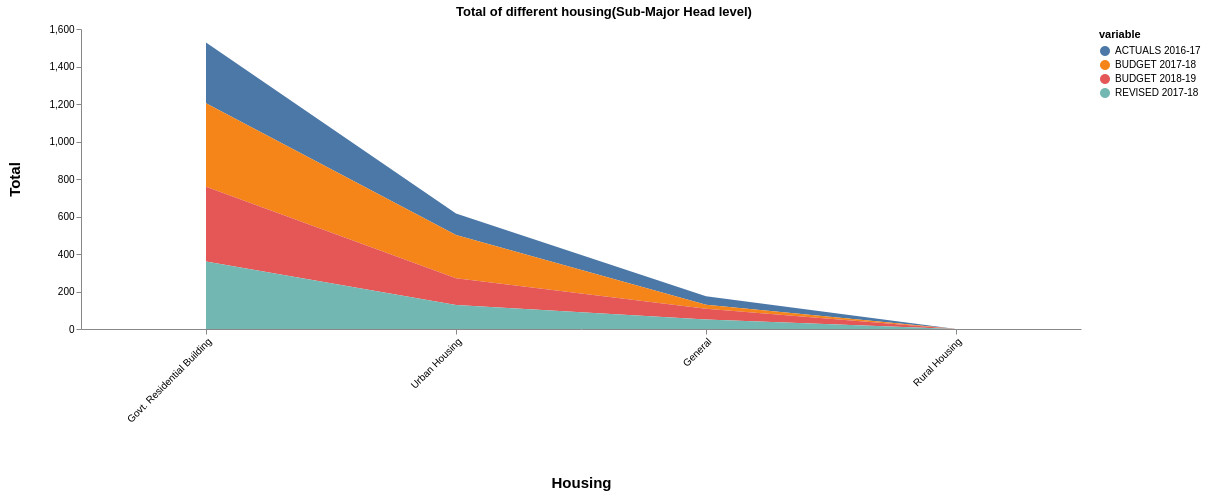

In [340]:
df3 = pd.DataFrame({
    'index': groupby_Housing['Sub-Major Head'],
    'BUDGET 2018-19': groupby_Housing['BUDGET 2018-19'],
    'REVISED 2017-18' : groupby_Housing['REVISED 2017-18'],
    'BUDGET 2017-18': groupby_Housing['BUDGET 2017-18'],
    'ACTUALS 2016-17': groupby_Housing['ACTUALS 2016-17']
})

alt.Chart(df3.melt('index')).mark_area().encode(
    alt.X('index:N', axis=alt.Axis(title='Housing',format='.0%'), sort = alt.EncodingSortField(field = 'value',op = 'sum', order = 'descending')),
    alt.Y('value:Q', axis=alt.Axis(title='Total', grid=False)),
    
    color=alt.Color('variable:N'),
    tooltip=['value:Q', 'index:N', 'variable:N']
).configure_view(
    stroke='transparent'
    
).configure_axisX(
     labelAngle = 315,
    titlePadding = 50,
    titleFontSize = 15
    
).configure_axisY(
    titlePadding = 25,
    titleFontSize = 15
).properties(
    width = 1000
).interactive().properties(
title = 'Total of different housing(Sub-Major Head level)')


In [322]:
groupby_Grant_in_aid = pd.read_csv('/home/ubuntu/civicdatalab/Assam budgetboard/dataset/receipts data/groupby data/groupby_Grant_in_aid.csv')

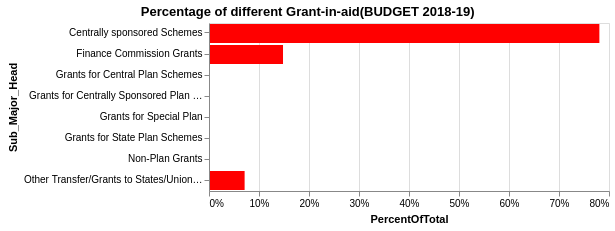

In [323]:
alt.Chart(groupby_Grant_in_aid).mark_bar(color = 'red').encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='Sub_Major_Head:O'
).transform_window(
    TotalArea='sum(BUDGET_2018_19)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.BUDGET_2018_19/datum.TotalArea"
).properties(
title = 'Percentage of different Grant-in-aid(BUDGET 2018-19)'
).interactive()


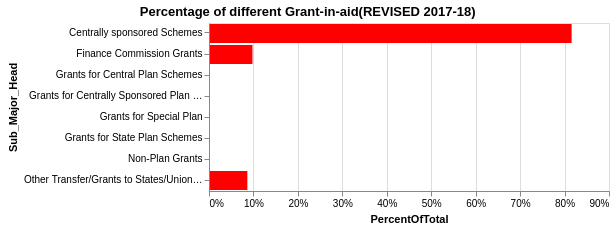

In [324]:
alt.Chart(groupby_Grant_in_aid).mark_bar(color = 'red').encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='Sub_Major_Head:O'
).transform_window(
    TotalArea='sum(REVISED_2017_18)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.REVISED_2017_18/datum.TotalArea"
).properties(
title = 'Percentage of different Grant-in-aid(REVISED 2017-18)'
).interactive()


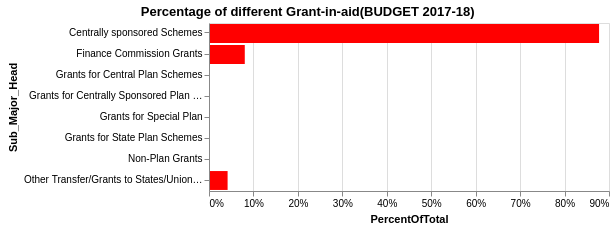

In [325]:
alt.Chart(groupby_Grant_in_aid).mark_bar(color = 'red').encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='Sub_Major_Head:O'
).transform_window(
    TotalArea='sum(BUDGET_2017_18)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.BUDGET_2017_18/datum.TotalArea"
).properties(
title = 'Percentage of different Grant-in-aid(BUDGET 2017-18)'
).interactive()


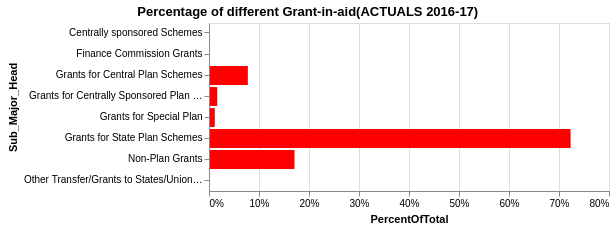

In [326]:
alt.Chart(groupby_Grant_in_aid).mark_bar(color = 'red').encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='Sub_Major_Head:O'
).transform_window(
    TotalArea='sum(ACTUALS_2016_17)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.ACTUALS_2016_17/datum.TotalArea"
).properties(
title = 'Percentage of different Grant-in-aid(ACTUALS 2016-17)'
).interactive()


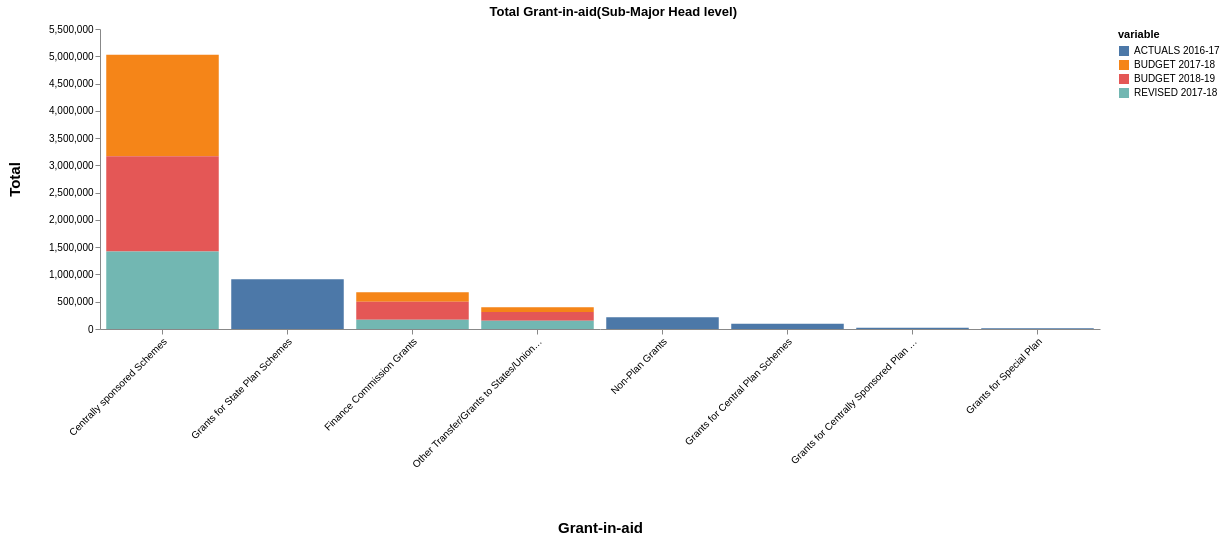

In [327]:
df1 = pd.DataFrame({
    'index': groupby_Grant_in_aid['Sub_Major_Head'],
    'BUDGET 2018-19': groupby_Grant_in_aid['BUDGET_2018_19'],
    'REVISED 2017-18' : groupby_Grant_in_aid['REVISED_2017_18'],
    'BUDGET 2017-18': groupby_Grant_in_aid['BUDGET_2017_18'],
    'ACTUALS 2016-17': groupby_Grant_in_aid['ACTUALS_2016_17']
})

alt.Chart(df1.melt('index')).mark_bar().encode(
    alt.X('index:N', axis=alt.Axis(title='Grant-in-aid'), sort = alt.EncodingSortField(field = 'value',op = 'sum', order = 'descending')),
    alt.Y('value:Q', axis=alt.Axis(title='Total', grid=False)),
    
    color=alt.Color('variable:N'),
    tooltip=['value:Q', 'index:N', 'variable:N']
).configure_view(
    stroke='transparent'
    
).configure_axisX(
     labelAngle = 315,
    titlePadding = 50,
    titleFontSize = 15
    
).configure_axisY(
    titlePadding = 25,
    titleFontSize = 15
).properties(
    width = 1000
).interactive().properties(
title = 'Total Grant-in-aid(Sub-Major Head level)')

In [329]:
groupby_Education = pd.read_csv('/home/ubuntu/civicdatalab/Assam budgetboard/dataset/receipts data/groupby data/groupby_Education.csv')

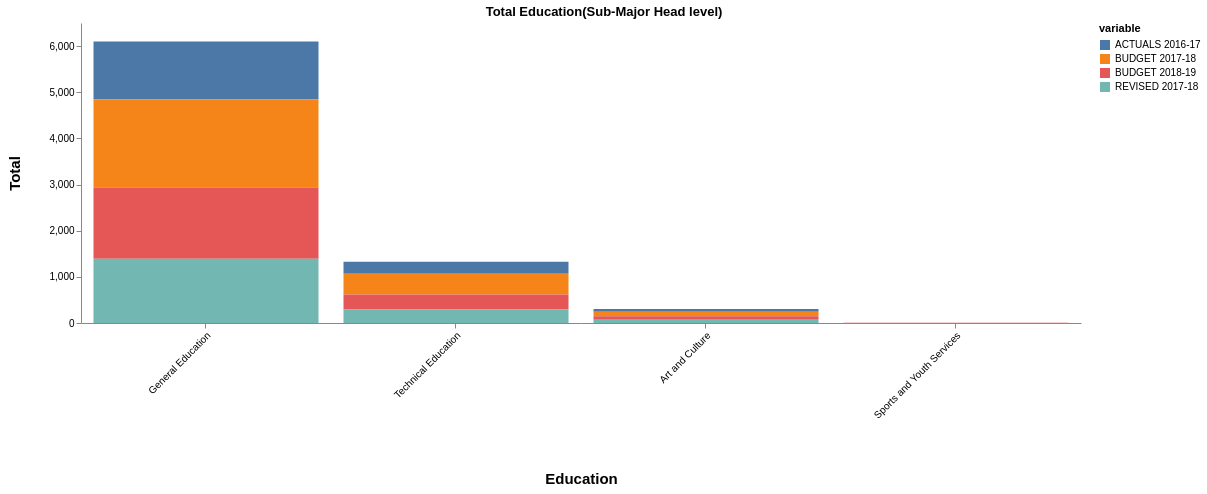

In [341]:
df1 = pd.DataFrame({
    'index':groupby_Education['Sub-Major Head'],
    'BUDGET 2018-19': groupby_Education['BUDGET_2018_19'],
    'REVISED 2017-18' : groupby_Education['REVISED_2017_18'],
    'BUDGET 2017-18': groupby_Education['BUDGET_2017_18'],
    'ACTUALS 2016-17':groupby_Education['ACTUALS_2016_17']
})

alt.Chart(df1.melt('index')).mark_bar().encode(
    alt.X('index:N', axis=alt.Axis(title='Education'), sort = alt.EncodingSortField(field = 'value',op = 'sum', order = 'descending')),
    alt.Y('value:Q', axis=alt.Axis(title='Total', grid=False)),
    
    color=alt.Color('variable:N'),
    tooltip=['value:Q', 'index:N', 'variable:N']
).configure_view(
    stroke='transparent'
    
).configure_axisX(
     labelAngle = 315,
    titlePadding = 50,
    titleFontSize = 15
    
).configure_axisY(
    titlePadding = 25,
    titleFontSize = 15
).properties(
    width = 1000
).interactive().properties(
title = 'Total Education(Sub-Major Head level)')

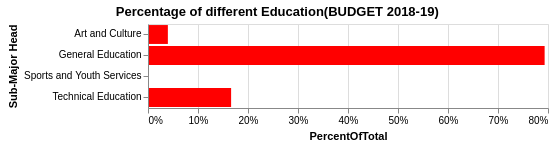

In [331]:
alt.Chart(groupby_Education).mark_bar(color = 'red').encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='Sub-Major Head:O'
).transform_window(
    TotalArea='sum(BUDGET_2018_19)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.BUDGET_2018_19/datum.TotalArea"
).properties(
title = 'Percentage of different Education(BUDGET 2018-19)'
).interactive()


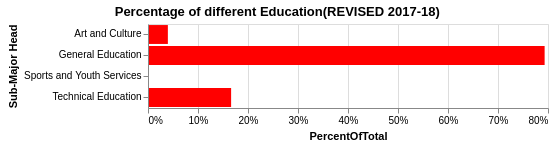

In [332]:
alt.Chart(groupby_Education).mark_bar(color = 'red').encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='Sub-Major Head:O'
).transform_window(
    TotalArea='sum(REVISED_2017_18)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.REVISED_2017_18/datum.TotalArea"
).properties(
title = 'Percentage of different Education(REVISED 2017-18)'
).interactive()


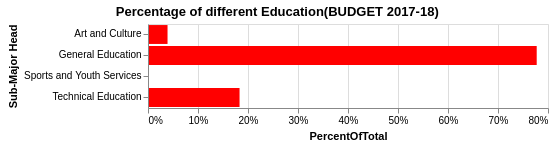

In [333]:
alt.Chart(groupby_Education).mark_bar(color = 'red').encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='Sub-Major Head:O'
).transform_window(
    TotalArea='sum(BUDGET_2017_18)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.BUDGET_2017_18/datum.TotalArea"
).properties(
title = 'Percentage of different Education(BUDGET 2017-18)'
).interactive()


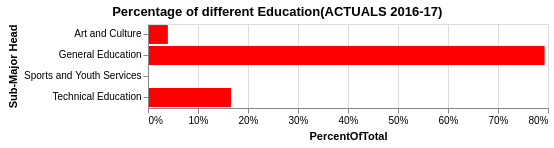

In [334]:
alt.Chart(groupby_Education).mark_bar(color = 'red').encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='Sub-Major Head:O'
).transform_window(
    TotalArea='sum(ACTUALS_2016_17)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.ACTUALS_2016_17/datum.TotalArea"
).properties(
title = 'Percentage of different Education(ACTUALS 2016-17)'
).interactive()


In [338]:
groupby_Education_minor = pd.read_csv('/home/ubuntu/civicdatalab/Assam budgetboard/dataset/receipts data/groupby data/groupby_Education_minor.csv')

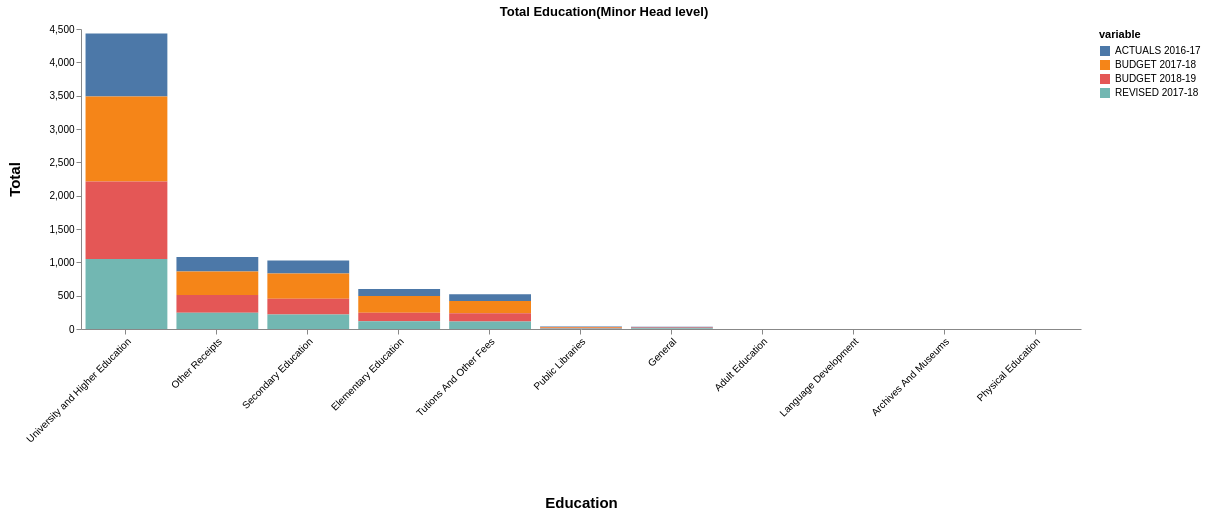

In [342]:
df1 = pd.DataFrame({
    'index':groupby_Education_minor['Minor Head'],
    'BUDGET 2018-19': groupby_Education_minor['BUDGET_2018_19'],
    'REVISED 2017-18' : groupby_Education_minor['REVISED_2017_18'],
    'BUDGET 2017-18': groupby_Education_minor['BUDGET_2017_18'],
    'ACTUALS 2016-17':groupby_Education_minor['ACTUALS_2016_17']
})

alt.Chart(df1.melt('index')).mark_bar().encode(
    alt.X('index:N', axis=alt.Axis(title='Education'), sort = alt.EncodingSortField(field = 'value',op = 'sum', order = 'descending')),
    alt.Y('value:Q', axis=alt.Axis(title='Total', grid=False)),
    
    color=alt.Color('variable:N'),
    tooltip=['value:Q', 'index:N', 'variable:N']
).configure_view(
    stroke='transparent'
    
).configure_axisX(
     labelAngle = 315,
    titlePadding = 50,
    titleFontSize = 15
    
).configure_axisY(
    titlePadding = 25,
    titleFontSize = 15
).properties(
    width = 1000
).interactive().properties(
title = 'Total Education(Minor Head level)')